In [1]:

import csv as csv
import numpy as np
import pandas
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold



In [2]:
#load in CSV files


#load in csv file train data
data = pandas.read_csv('train.csv', header = 0)

#load in csv file test data
data_test = pandas.read_csv('test.csv', header = 0)

Exploratory analysis will include:
1. type of data available
2. looking at the first few rows of data

In [ ]:
data.describe()


In [ ]:
data.head(10)

In [ ]:
#color



In [ ]:
#create barcharts
table1 = pandas.crosstab(index=data["OutcomeSubtype"], 
                          columns=data["OutcomeType"])

table1.plot(kind="bar",stacked=True)


In [7]:
#feature engineering 

#split the sex upon outcome into distinct buckets
data['Neutered']=data['SexuponOutcome'].str.split().str.get(0)
data['Gender']=data['SexuponOutcome'].str.split().str.get(1)

#transform age into actual age there
data['Number']=data['AgeuponOutcome'].str.split().str.get(0).astype(float)
data['Type']=data['AgeuponOutcome'].str.split().str.get(1)

data['Age']=0
data.loc[(data['Type']=="week"),'Age']=7*data['Number']
data.loc[(data['Type']=="weeks"),'Age']=7*data['Number']
data.loc[(data['Type']=="month"),'Age']=30*data['Number']
data.loc[(data['Type']=="months"),'Age']=30*data['Number']
data.loc[(data['Type']=="year"),'Age']=365*data['Number']
data.loc[(data['Type']=="years"),'Age']=365*data['Number']


#replace missing values for neutered and gender
data.loc[(data['Neutered'].isnull()),'Neutered']="Unknown"

data.loc[((data['Gender'].isnull()) & (data['Neutered']=="Neutered")),'Gender']="Male"
data.loc[((data['Gender'].isnull()) & (data['Neutered']=="Spayed")),'Gender']="Female"
data.loc[((data['Gender'].isnull()) & (data['Neutered']=="Intact")),'Gender']="Unknown"
data.loc[((data['Gender'].isnull()) & (data['Neutered']=="Unknown")),'Gender']="Unknown"

#replace missing values for age

#find month of entry
data['Month']=data['DateTime'].str.split('-').str.get(1)
data.loc[(data['Month']=='01'),'Month2']=1
data.loc[(data['Month']=='02'),'Month2']=2
data.loc[(data['Month']=='03'),'Month2']=3
data.loc[(data['Month']=='04'),'Month2']=4
data.loc[(data['Month']=='05'),'Month2']=5
data.loc[(data['Month']=='06'),'Month2']=6
data.loc[(data['Month']=='07'),'Month2']=7
data.loc[(data['Month']=='08'),'Month2']=8
data.loc[(data['Month']=='09'),'Month2']=9
data.loc[(data['Month']=='10'),'Month2']=10
data.loc[(data['Month']=='11'),'Month2']=12
data.loc[(data['Month']=='12'),'Month2']=11
data = data.drop(['Month'], axis = 1)

#has a name
data['Named']=1
data.loc[(data['Name'].isnull()),'Named']=0

#primary color
data['PrimaryColor']=data['Color'].str.split().str.get(0)
data['PrimaryColor']=data['PrimaryColor'].str.split('/').str.get(0)


#breed
#data['Breed2']=data['Breed'].str.split('/').str.get(0)
#data['Breed2']=data['Breed2'].str.replace(' Mix','')
#data['Breed2']=data['Breed2'].str.replace('American ','')
#data['Breed2']=data['Breed2'].str.replace('Belgian ','')
#data['Breed2']=data['Breed2'].str.replace('Australian ','')
#data['Breed2']=data['Breed2'].str.replace('Welsh ','')
#data['Breed2']=data['Breed2'].str.replace('Swedish ','')
#data['Breed2']=data['Breed2'].str.replace('Yorkshire ','')
#data['Breed2']=data['Breed2'].str.replace('Tibetan ','')
#data['Breed2']=data['Breed2'].str.replace('Staffordshire ','')
#data['Breed2']=data['Breed2'].str.replace('Alaskan','')

#mix
#data['Mix']=data['Breed'].str.contains('Mix')
data['Mix']=0
data.loc[(data['Breed'].str.contains('Mix')==True),'Mix']=1

#breeds
data['Pitbull']=0
data.loc[(data['Breed'].str.contains('Pit Bull')==True),'Pitbull']=1

data['Terrier']=0
data.loc[(data['Breed'].str.contains('Terrier')==True),'Terrier']=1

data['Retriever']=0
data.loc[(data['Breed'].str.contains('Retriever')==True),'Retriever']=1

data['Hound']=0
data.loc[(data['Breed'].str.contains('Hound')==True),'Hound']=1

data['Shepherd']=0
data.loc[(data['Breed'].str.contains('Shepherd')==True),'Shepherd']=1

data['Bulldog']=0
data.loc[(data['Breed'].str.contains('Bulldog')==True),'Bulldog']=1

data['Setter']=0
data.loc[(data['Breed'].str.contains('Setter')==True),'Setter']=1

data['Spaniel']=0
data.loc[(data['Breed'].str.contains('Spaniel')==True),'Spaniel']=1

data['Collie']=0
data.loc[(data['Breed'].str.contains('Collie')==True),'Collie']=1

data['Pinscher']=0
data.loc[(data['Breed'].str.contains('Pinscher')==True),'Pinscher']=1

data['Poodle']=0
data.loc[(data['Breed'].str.contains('Poodle')==True),'Poodle']=1

data['Domestic']=0
data.loc[(data['Breed'].str.contains('Domestic')==True),'Domestic']=1

data['Longhair']=0
data.loc[(data['Breed'].str.contains('Longhair')==True),'Longhair']=1

data['Shorthair']=0
data.loc[(data['Breed'].str.contains('Shorthair')==True),'Shorthair']=1

data['Beagle']=0
data.loc[(data['Breed'].str.contains('Beagle')==True),'Beagle']=1

data['Boxer']=0
data.loc[(data['Breed'].str.contains('Boxer')==True),'Boxer']=1

data['Cattle']=0
data.loc[(data['Breed'].str.contains('Cattle')==True),'Cattle']=1

data['Pug']=0
data.loc[(data['Breed'].str.contains('Pug')==True),'Pug']=1

data['Rottweiler']=0
data.loc[(data['Breed'].str.contains('Rottweiler')==True),'Rottweiler']=1

data['Siamese']=0
data.loc[(data['Breed'].str.contains('Siamese')==True),'Siamese']=1

data['Husky']=0
data.loc[(data['Breed'].str.contains('Husky')==True),'Husky']=1

data['Pointer']=0
data.loc[(data['Breed'].str.contains('Pointer')==True),'Pointer']=1








data.head(20)



pandas.crosstab(data['Retriever'],data['OutcomeType'] ).transpose()

#print data['PrimaryColor']

#np.savetxt("breed.csv", pandas.crosstab(data['OutcomeType'], data['Breed2']).transpose(), delimiter= ",", fmt = '%.1i',comments='',header = "ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer")

#pandas.crosstab(data['OutcomeType'], data['Breed2']).transpose().to_csv("breed2.csv")

Retriever,0,1
OutcomeType,,
Adoption,9666,1103
Died,189,8
Euthanasia,1446,109
Return_to_owner,4156,630
Transfer,8830,592


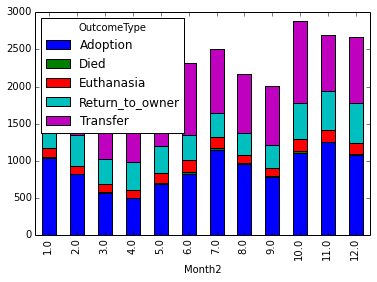

In [8]:
#create barcharts
table1 = pandas.crosstab(index=data["Month2"], 
                          columns=data["OutcomeType"])

table1.plot(kind="bar",stacked=True)



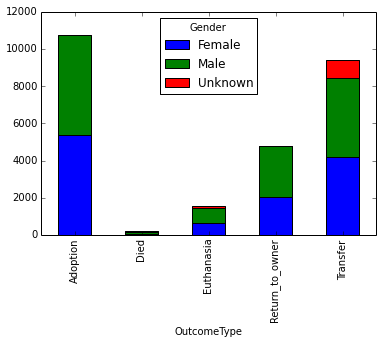

In [9]:
#display the chart for Gender

table2 = pandas.crosstab(index=data["OutcomeType"], 
                          columns=data["Gender"])

table2.plot(kind="bar",stacked=True)

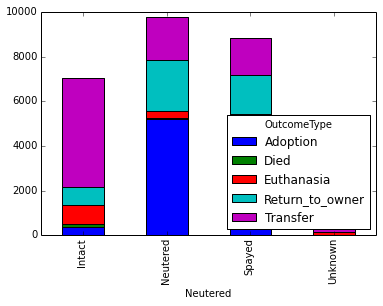

In [10]:
#display the chart for Neutered

table3 = pandas.crosstab(index=data["Neutered"], 
                          columns=data["OutcomeType"])

table3.plot(kind="bar",stacked=True)

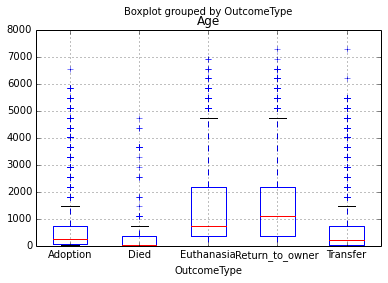

In [11]:
#create a boxplot of age versus outcome

data.boxplot(column = "Age", by="OutcomeType")

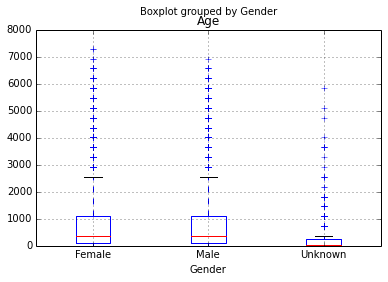

In [12]:
#create chart for age versus neutered
data.boxplot(column = "Age", by="Gender")

In [13]:
#do the same feature engineering for the test data set

#feature engineering 

#split the sex upon outcome into distinct buckets
data_test['Neutered']=data_test['SexuponOutcome'].str.split().str.get(0)
data_test['Gender']=data_test['SexuponOutcome'].str.split().str.get(1)

#transform age into actual age there
data_test['Number']=data_test['AgeuponOutcome'].str.split().str.get(0).astype(float)
data_test['Type']=data_test['AgeuponOutcome'].str.split().str.get(1)

data_test['Age']=0
data_test.loc[(data_test['Type']=="week"),'Age']=7*data_test['Number']
data_test.loc[(data_test['Type']=="weeks"),'Age']=7*data_test['Number']
data_test.loc[(data_test['Type']=="month"),'Age']=30*data_test['Number']
data_test.loc[(data_test['Type']=="months"),'Age']=30*data_test['Number']
data_test.loc[(data_test['Type']=="year"),'Age']=365*data_test['Number']
data_test.loc[(data_test['Type']=="years"),'Age']=365*data_test['Number']


#replace missing values for neutered and gender
data_test.loc[(data_test['Neutered'].isnull()),'Neutered']="Unknown"

data_test.loc[((data_test['Gender'].isnull()) & (data_test['Neutered']=="Neutered")),'Gender']="Male"
data_test.loc[((data_test['Gender'].isnull()) & (data_test['Neutered']=="Spayed")),'Gender']="Female"
data_test.loc[((data_test['Gender'].isnull()) & (data_test['Neutered']=="Intact")),'Gender']="Unknown"
data_test.loc[((data_test['Gender'].isnull()) & (data_test['Neutered']=="Unknown")),'Gender']="Unknown"

#replace missing values for age

#find month of entry
data_test['Month']=data_test['DateTime'].str.split('-').str.get(1)
data_test.loc[(data_test['Month']=='01'),'Month2']=1
data_test.loc[(data_test['Month']=='02'),'Month2']=2
data_test.loc[(data_test['Month']=='03'),'Month2']=3
data_test.loc[(data_test['Month']=='04'),'Month2']=4
data_test.loc[(data_test['Month']=='05'),'Month2']=5
data_test.loc[(data_test['Month']=='06'),'Month2']=6
data_test.loc[(data_test['Month']=='07'),'Month2']=7
data_test.loc[(data_test['Month']=='08'),'Month2']=8
data_test.loc[(data_test['Month']=='09'),'Month2']=9
data_test.loc[(data_test['Month']=='10'),'Month2']=10
data_test.loc[(data_test['Month']=='11'),'Month2']=12
data_test.loc[(data_test['Month']=='12'),'Month2']=11
data_test = data_test.drop(['Month'], axis = 1)

#has a name
data_test['Named']=1
data_test.loc[(data_test['Name'].isnull()),'Named']=0

#primary color
data_test['PrimaryColor']=data_test['Color'].str.split().str.get(0)
data_test['PrimaryColor']=data_test['PrimaryColor'].str.split('/').str.get(0)


#breed
#data_test['Breed2']=data_test['Breed'].str.split('/').str.get(0)
#data_test['Breed2']=data_test['Breed2'].str.replace(' Mix','')
#data_test['Breed2']=data_test['Breed2'].str.replace('American ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Belgian ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Australian ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Welsh ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Swedish ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Yorkshire ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Tibetan ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Staffordshire ','')
#data_test['Breed2']=data_test['Breed2'].str.replace('Alaskan','')

#mix
data_test['Mix']=0
data_test.loc[(data_test['Breed'].str.contains('Mix')==True),'Mix']=1

#breed
#breeds
data_test['Pitbull']=0
data_test.loc[(data_test['Breed'].str.contains('Pit Bull')==True),'Pitbull']=1

data_test['Terrier']=0
data_test.loc[(data_test['Breed'].str.contains('Terrier')==True),'Terrier']=1

data_test['Retriever']=0
data_test.loc[(data_test['Breed'].str.contains('Retriever')==True),'Retriever']=1

data_test['Hound']=0
data_test.loc[(data_test['Breed'].str.contains('Hound')==True),'Hound']=1

data_test['Shepherd']=0
data_test.loc[(data_test['Breed'].str.contains('Shepherd')==True),'Shepherd']=1

data_test['Bulldog']=0
data_test.loc[(data_test['Breed'].str.contains('Bulldog')==True),'Bulldog']=1

data_test['Setter']=0
data_test.loc[(data_test['Breed'].str.contains('Setter')==True),'Setter']=1

data_test['Spaniel']=0
data_test.loc[(data_test['Breed'].str.contains('Spaniel')==True),'Spaniel']=1

data_test['Collie']=0
data_test.loc[(data_test['Breed'].str.contains('Collie')==True),'Collie']=1

data_test['Pinscher']=0
data_test.loc[(data_test['Breed'].str.contains('Pinscher')==True),'Pinscher']=1

data_test['Poodle']=0
data_test.loc[(data_test['Breed'].str.contains('Poodle')==True),'Poodle']=1

data_test['Domestic']=0
data_test.loc[(data_test['Breed'].str.contains('Domestic')==True),'Domestic']=1

data_test['Longhair']=0
data_test.loc[(data_test['Breed'].str.contains('Longhair')==True),'Longhair']=1

data_test['Shorthair']=0
data_test.loc[(data_test['Breed'].str.contains('Shorthair')==True),'Shorthair']=1

data_test['Beagle']=0
data_test.loc[(data_test['Breed'].str.contains('Beagle')==True),'Beagle']=1

data_test['Boxer']=0
data_test.loc[(data_test['Breed'].str.contains('Boxer')==True),'Boxer']=1

data_test['Cattle']=0
data_test.loc[(data_test['Breed'].str.contains('Cattle')==True),'Cattle']=1

data_test['Pug']=0
data_test.loc[(data_test['Breed'].str.contains('Pug')==True),'Pug']=1

data_test['Rottweiler']=0
data_test.loc[(data_test['Breed'].str.contains('Rottweiler')==True),'Rottweiler']=1

data_test['Siamese']=0
data_test.loc[(data_test['Breed'].str.contains('Siamese')==True),'Siamese']=1

data_test['Husky']=0
data_test.loc[(data_test['Breed'].str.contains('Husky')==True),'Husky']=1

data_test['Pointer']=0
data_test.loc[(data_test['Breed'].str.contains('Pointer')==True),'Pointer']=1





data.info()
data_test.info()

#pandas.crosstab(data_test['Gender'], data_test['Neutered']).transpose()

#pandas.isnull(data_test['Gender'])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 41 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
Neutered          26729 non-null object
Gender            26729 non-null object
Number            26711 non-null float64
Type              26711 non-null object
Age               26729 non-null float64
Month2            26729 non-null float64
Named             26729 non-null int64
PrimaryColor      26729 non-null object
Mix               26729 non-null int64
Pitbull           26729 non-null int64
Terrier           26729 non-null int64
Retriever         26729 non-null int64
Hound        

In [14]:
#converting categorial variables into one hot encoding
from sklearn.preprocessing import OneHotEncoder

l_an_type = LabelEncoder()
l_neu = LabelEncoder()
l_gen = LabelEncoder()
l_col = LabelEncoder()
#l_breed = LabelEncoder()

data['AnimalType']= l_an_type.fit_transform(data['AnimalType'])
data['Neutered'] = l_neu.fit_transform(data['Neutered'])
data['Gender'] = l_gen.fit_transform(data['Gender'])
data['PrimaryColor'] = l_col.fit_transform(data['PrimaryColor'])
#data['Breed2'] = l_breed.fit_transform(data['Breed2'])

data_test['AnimalType'] = l_an_type.transform(data_test['AnimalType'])
data_test['Neutered'] = l_neu.transform(data_test['Neutered'])
data_test['Gender'] = l_gen.transform(data_test['Gender'])
data_test['PrimaryColor'] = l_col.transform(data_test['PrimaryColor'])
#data_test['Breed2'] = l_breed.transform(data_test['Breed2'])

#an_type = OneHotEncoder()
#neu = OneHotEncoder()
#gen = OneHotEncoder()

#an_type.fit_transform(data['AnimalType'])
#neu.fit_transform(data['Neutered'])
#gen.fit_transform(data['Gender'])

#an_type.transform(data_test['AnimalType'])
#neu.transform(data_test['Neutered'])
#gen.transform(data_test['Gender'])


In [15]:
#drop variables that aren't to be used

data = data.drop(['OutcomeSubtype','Type','Number','SexuponOutcome','AgeuponOutcome', 'Name','DateTime','Breed','Color'], axis = 1)
data = data.drop(['AnimalID'], axis = 1)
data=data.dropna()

data_labels = pandas.DataFrame()
data_labels['OutcomeType'] = data['OutcomeType']
data = data.drop(['OutcomeType'], axis = 1)

results = pandas.DataFrame()
results['ID'] = data_test['ID']

data_test = data_test.drop(['Type','Number','SexuponOutcome','AgeuponOutcome','Name','DateTime','Breed','Color'], axis = 1)
data_test = data_test.drop(['ID'], axis = 1)

data_test=data_test.dropna()


data.info()
data_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26729 entries, 0 to 26728
Data columns (total 30 columns):
AnimalType      26729 non-null int64
Neutered        26729 non-null int64
Gender          26729 non-null int64
Age             26729 non-null float64
Month2          26729 non-null float64
Named           26729 non-null int64
PrimaryColor    26729 non-null int64
Mix             26729 non-null int64
Pitbull         26729 non-null int64
Terrier         26729 non-null int64
Retriever       26729 non-null int64
Hound           26729 non-null int64
Shepherd        26729 non-null int64
Bulldog         26729 non-null int64
Setter          26729 non-null int64
Spaniel         26729 non-null int64
Collie          26729 non-null int64
Pinscher        26729 non-null int64
Poodle          26729 non-null int64
Domestic        26729 non-null int64
Longhair        26729 non-null int64
Shorthair       26729 non-null int64
Beagle          26729 non-null int64
Boxer           26729 non-null int64

In [16]:
from sklearn.preprocessing import OneHotEncoder


#l_an_type = LabelEncoder()
#l_neu = LabelEncoder()
#l_gen = LabelEncoder()
#l_col = LabelEncoder()


#data['AnimalType']= l_an_type.fit_transform(data['AnimalType'])
#data['Neutered'] = l_neu.fit_transform(data['Neutered'])
#data['Gender'] = l_gen.fit_transform(data['Gender'])
#data['PrimaryColor'] = l_col.fit_transform(data['PrimaryColor'])

#data_test['AnimalType'] = l_an_type.transform(data_test['AnimalType'])
#data_test['Neutered'] = l_neu.transform(data_test['Neutered'])
#data_test['Gender'] = l_gen.transform(data_test['Gender'])
#data_test['PrimaryColor'] = l_col.transform(data_test['PrimaryColor'])



#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(data)
#data = enc.transform(data).toarray()
#data_test = enc.transform(data_test).toarray()

In [17]:
data.head()
#data_test.info()

,AnimalType,Neutered,Gender,Age,Month2,Named,PrimaryColor,Mix,Pitbull,Terrier,...,Longhair,Shorthair,Beagle,Boxer,Cattle,Pug,Rottweiler,Siamese,Husky,Pointer
0,1,1,1,365.0,2.0,1,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,365.0,10.0,1,8,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,1,730.0,1.0,1,3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,21.0,7.0,0,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,1,730.0,12.0,0,23,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:

#split the train data into train and validation samples


data = np.array(data, dtype=np.float32)
data_labels = np.array(data_labels)

#plain splitting
train_data, validation_data, train_labels, valid_labels = train_test_split(data,data_labels, test_size = 0.15)


#split the train data into train and validation samples



#plain splitting
#train_data, validation_data = train_test_split(data, test_size = 0.15)


#valid_data2=validation_data

#validation_data = validation_data.values
#train_data=train_data.values
#data_test = data_test.values

Model Creation
Different models can be tried out here. The list is in the back

In [29]:
#Function
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split = 250)

In [30]:
#train and predict

clf.fit(train_data, train_labels.ravel())
pred = clf.predict(data_test)
predori = clf.predict(validation_data)
predtrain = clf.predict(train_data)

In [31]:
#print accuracy for test and validation sets

from sklearn.metrics import accuracy_score
acc = accuracy_score(predori, valid_labels)
print "Validation Accuracy: ", acc

acc2 = accuracy_score(predtrain, train_labels)
print "Train accuracy: ", acc2

from sklearn.metrics import classification_report
print(classification_report(valid_labels, predori, labels=None,target_names=None,))

Validation Accuracy:  0.631421446384
Train accuracy:  0.6578634623
             precision    recall  f1-score   support

   Adoption       0.62      0.86      0.72      1579
       Died       0.00      0.00      0.00        39
 Euthanasia       0.47      0.18      0.26       232
Return_to_owner       0.47      0.39      0.43       720
   Transfer       0.75      0.60      0.67      1440

avg / total       0.63      0.63      0.61      4010



In [32]:
prediction = pandas.DataFrame(predtrain)

results['Prediction']=prediction
results['Adoption'] =0
results.loc[(results['Prediction']=="Adoption"),'Adoption']=1
results['Died']=0
results.loc[(results['Prediction']=="Died"),'Died']=1
results['Euthanasia']=0
results.loc[(results['Prediction']=="Euthanasia"),'Euthanasia']=1
results['Return_to_owner']=0
results.loc[(results['Prediction']=="Return_to_owner"),'Return_to_owner']=1
results['Transfer']=0
results.loc[(results['Prediction']=="Transfer"),'Transfer']=1

results = results.drop(['Prediction'], axis = 1)

results = results.values

In [33]:
print results
np.savetxt("results.csv", results, delimiter= ",", fmt = '%.1i',comments='',header = "ID,Adoption,Died,Euthanasia,Return_to_owner,Transfer")




[[    1     1     0     0     0     0]
 [    2     1     0     0     0     0]
 [    3     0     0     0     0     1]
 ..., 
 [11454     1     0     0     0     0]
 [11455     1     0     0     0     0]
 [11456     0     0     1     0     0]]


Unused regressions
1. Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

2. Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

3. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(min_samples_split=20)

5. SVM

from sklearn import svm
clf = svm.SVC()



